<a href="https://colab.research.google.com/github/Saksham-tyagi1/NBA-Analysis/blob/main/Clustering_Stage_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold,train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from joblib import Parallel, delayed
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from matplotlib.patches import Arc

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [4]:
df = pd.read_parquet('/content/drive/MyDrive/Encoded_data.parquet')

In [ ]:
df.head()

,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,SPD,DIST,ORBC,DRBC,TCHS,SAST,AST,FGM,FGA,DFGM,DFGA,DFG_PCT,SHOT_CLOCK_RANGE,SCORE,SCOREMARGIN,EFG_PCT,PERSON1TYPE,PERSON2TYPE,PERSON3TYPE,LOC_X_BIN,LOC_Y_BIN,SHOT_DISTANCE_BIN,ACTION_TYPE_modified,game_time,time_left_in_quarter,time_left_in_game,last_shot_of_quarter,shot_clock_status,is_clutch,rolling_efg_pct,rolling_score_margin,last_30_seconds,shots_in_last_30_seconds,quarter_progress,zone_combination,zone_combination_attempts,zone_combination_made,zone_combination_success_rate,BASIC_ZONE_freq,zone_dfg%,DFG%,zone_fg%,clutch_efg_pct,clutch_dfg_pct,is_hot_zone,rolling_dfg%,rolling_efg%,SHOT_TYPE_2PT Field Goal,SHOT_TYPE_3PT Field Goal,BASIC_ZONE_Above the Break 3,BASIC_ZONE_Backcourt,BASIC_ZONE_In The Paint (Non-RA),BASIC_ZONE_Left Corner 3,BASIC_ZONE_Mid-Range,BASIC_ZONE_Restricted Area,BASIC_ZONE_Right Corner 3,ZONE_NAME_Back Court,ZONE_NAME_Center,ZONE_NAME_Left Side,ZONE_NAME_Left Side Center,ZONE_NAME_Right Side,ZONE_NAME_Right Side Center,ZONE_RANGE_16-24 ft.,ZONE_RANGE_24+ ft.,ZONE_RANGE_8-16 ft.,ZONE_RANGE_Back Court Shot,ZONE_RANGE_Less Than 8 ft.,POSITION_GROUP_C,POSITION_GROUP_F,POSITION_GROUP_G,ACTION_TYPE_freq,shot_clock_status_Average,shot_clock_status_Early,shot_clock_status_Late,shot_clock_status_Very Early,shot_clock_status_Very Late,quarter_progress_Early,quarter_progress_Middle,quarter_progress_Late,POSITION_modified,POSITION_freq,LOC_X_orig,LOC_Y_orig,SHOT_DISTANCE_orig,SPD_orig,DIST_orig,ORBC_orig,DRBC_orig,TCHS_orig,SAST_orig,AST_orig,FGM_orig,FGA_orig,DFGM_orig,DFGA_orig,DFG_PCT_orig,SCOREMARGIN_orig,EFG_PCT_orig,PERSON1TYPE_orig,PERSON2TYPE_orig,PERSON3TYPE_orig,game_time_orig,time_left_in_quarter_orig,time_left_in_game_orig,rolling_efg_pct_orig,rolling_score_margin_orig,last_30_seconds_orig,shots_in_last_30_seconds_orig,zone_combination_attempts_orig,zone_combination_made_orig,zone_combination_success_rate_orig,BASIC_ZONE_freq_orig,zone_dfg%_orig,DFG%_orig,zone_fg%_orig,clutch_efg_pct_orig,clutch_dfg_pct_orig,rolling_dfg%_orig,rolling_efg%_orig,ACTION_TYPE_freq_orig,POSITION_freq_orig,shot_cluster
0,1610612747,Los Angeles Lakers,2544,LeBron James,F,PF,03-16-2024,22300973,LAL,GSW,True,Turnaround Fadeaway shot,2PT Field Goal,Mid-Range,Left Side,8-16 ft.,1.164516,-0.767899,-0.066461,1,8,32,-1.968729,0.424169,0.726167,-0.166752,1.657492,1.171734,1.489494,2.043248,1.973102,0.216947,0.586591,-0.325219,22-18 Very Early,0 - 3,0.199785,0.363455,-0.994115,0.499304,0.0,"(12.5, 15.0]","(5.81, 11.37]",midrange,Turnaround Fadeaway shot,-1.465149,0.776378,1.470902,0,Very Early,False,0.366165,0.203868,-0.235713,-0.887751,Late,Mid-Range_Left Side,-0.606305,-0.597711,-0.426884,-1.343735,-0.3924,-0.3252,0.979285,0.312657,-0.229292,True,-0.325326,0.369598,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,-0.886222,False,False,False,True,False,False,False,True,PF,-0.400507,13.7,7.45,13.0,3.7,2.48,1.721645,6.0,94.0,0.375887,2.890069,6.930638,8.224499,1.207078,1.892608,0.5,3.0,0.596,4.0,4.0,0.0,3.466667,512,2672,0.596,3.000000,0,0,6888,2646,0.384146,0.112099,0.614779,0.5,0.538118,0.566,0.596584,0.5,0.596,340513,3622633,3
1,1610612747,Los Angeles Lakers,2544,LeBron James,F,PF,03-16-2024,22300973,LAL,GSW,True,Turnaround Fadeaway shot,2PT Field Goal,Mid-Range,Left Side,8-16 ft.,1.164516,-0.767899,-0.066461,1,8,32,-1.968729,0.424169,0.726167,-0.166752,1.657492,1.171734,1.489494,2.043248,1.973102,0.216947,0.586591,-0.325219,22-18 Very Early,2 - 3,0.037688,0.363455,1.005920,0.957096,0.0,"(12.5, 15.0]","(5.81, 11.37]",midrange,Turnaround Fadeaway shot,-1.465149,0.776378,1.470902,0,Very Early,False,0.366165,0.121164,-0.235713,-0.887751,Late,Mid-Range_Left Side,-0.606305,-0.597711,-0.426884,-1.343735,-0.3924,-0.3252,0.979285,0.312657,-

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

all_variance = numeric_df.var()
all_std_dev = numeric_df.std()

print("Variance of all numeric features:\n", all_variance)
print("\nStandard Deviation of all numeric features:\n", all_std_dev)


# Feature Selection

In [5]:
stage_1_features = [
    'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'SHOT_MADE', 'ACTION_TYPE_freq',
    'shot_clock_status_Early', 'shot_clock_status_Late',
    'shot_clock_status_Very Early', 'shot_clock_status_Very Late',
    'SCOREMARGIN', 'time_left_in_game', 'time_left_in_quarter', 'QUARTER',
    'SHOT_TYPE_2PT Field Goal', 'SHOT_TYPE_3PT Field Goal',
    'BASIC_ZONE_Backcourt', 'BASIC_ZONE_In The Paint (Non-RA)',
    'BASIC_ZONE_Left Corner 3', 'BASIC_ZONE_Mid-Range',
    'BASIC_ZONE_Restricted Area', 'BASIC_ZONE_Right Corner 3',
    'ZONE_RANGE_8-16 ft.', 'ZONE_RANGE_24+ ft.', 'ZONE_RANGE_Less Than 8 ft.',
    'EFG_PCT', 'ORBC', 'DRBC', 'quarter_progress_Middle',
    'quarter_progress_Late','DFG_PCT', 'zone_dfg%', 'clutch_dfg_pct',
    'rolling_efg_pct'
]
df_stage_1 = df[stage_1_features]

In [6]:
stage_1_features_refined = [
    'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'SHOT_MADE', # Shot location
    'EFG_PCT', 'rolling_efg_pct', 'zone_dfg%', 'clutch_efg_pct', 'clutch_dfg_pct', 'DFG_PCT',  # Efficiency and defense
    'SHOT_TYPE_2PT Field Goal', 'SHOT_TYPE_3PT Field Goal',  # Shot type
    'BASIC_ZONE_Restricted Area', 'BASIC_ZONE_Mid-Range',
    'BASIC_ZONE_Left Corner 3', 'BASIC_ZONE_Right Corner 3',  # Zones
    'SCOREMARGIN', 'time_left_in_game', 'time_left_in_quarter',  # Shot context
    'shot_clock_status_Early', 'shot_clock_status_Late', 'shot_clock_status_Very Late',  # Shot clock
    'quarter_progress_Early', 'quarter_progress_Middle', 'quarter_progress_Late',  # Quarter progress
    'ORBC', 'DRBC'  # Rebounding metrics
]


In [6]:
missing_features = [col for col in stage_1_features_refined if col not in df.columns]
if missing_features:
    print(f"Missing Features: {missing_features}")
else:
    print("All features are present.")


NameError: name 'stage_1_features_refined' is not defined

In [ ]:
df_stage_1.dtypes

,0
LOC_X,float64
LOC_Y,float64
SHOT_DISTANCE,float64
SHOT_MADE,bool
ACTION_TYPE_freq,float64
shot_clock_status_Early,bool
shot_clock_status_Late,bool
shot_clock_status_Very Early,bool
shot_clock_status_Very Late,bool
SCOREMARGIN,float64


In [7]:
_, sampled_df = train_test_split(df_stage_1, test_size=0.02, stratify=df_stage_1['SHOT_TYPE_2PT Field Goal'])


In [8]:
# Define X (features) and y (target)
X_sample = sampled_df.drop(['SHOT_MADE'], axis=1)
y_sample = sampled_df['SHOT_MADE']

# Perform RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_sample, y_sample)

# Get results
selected_features_rfe = X_sample.columns[rfe.support_]
rfe_ranking = pd.Series(rfe.ranking_, index=X_sample.columns)

# Display results
print("Selected Features:", selected_features_rfe.tolist())
print("\nRFE Rankings:\n", rfe_ranking.sort_values())


Selected Features: ['LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'ACTION_TYPE_freq', 'time_left_in_game', 'time_left_in_quarter', 'ORBC', 'DRBC', 'zone_dfg%', 'clutch_dfg_pct']

RFE Rankings:
 LOC_X                                1
LOC_Y                                1
SHOT_DISTANCE                        1
ACTION_TYPE_freq                     1
zone_dfg%                            1
DRBC                                 1
ORBC                                 1
time_left_in_game                    1
time_left_in_quarter                 1
clutch_dfg_pct                       1
DFG_PCT                              2
QUARTER                              3
SCOREMARGIN                          4
EFG_PCT                              5
BASIC_ZONE_Restricted Area           6
rolling_efg_pct                      7
quarter_progress_Middle              8
shot_clock_status_Early              9
ZONE_RANGE_Less Than 8 ft.          10
shot_clock_status_Late              11
shot_clock_status_Very Early        1

In [9]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from joblib import Parallel, delayed
import numpy as np

# Define features and target
core_features = [feature for feature in stage_1_features if feature != 'SHOT_MADE']
X_core = sampled_df.drop(columns=['SHOT_MADE'])  # Features
y_core = sampled_df['SHOT_MADE']  # Target variable

alphas = [0.001, 0.005, 0.01]

# Function to apply LASSO for feature selection
def apply_lasso(alpha):
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X_core, y_core)

    # Extract coefficients
    feature_coefficients = lasso.coef_

    # Select features where coefficient is significant
    selected_features_lasso = [feature for feature, coef in zip(core_features, feature_coefficients) if abs(coef) > 1e-5]

    return alpha, selected_features_lasso, feature_coefficients

# Run LASSO for each alpha
results = [apply_lasso(alpha) for alpha in alphas]

# Store results in dictionary
lasso_results = {}
for alpha, selected_features, coefficients in results:
    lasso_results[alpha] = dict(zip(core_features, coefficients))
    print(f"\nAlpha: {alpha}")
    print("Selected Features after LASSO:", selected_features)
    print("Coefficients:", coefficients)

# Find intersection of selected features across all alpha values
final_streamlined_features = set.intersection(*[set(features) for _, features, _ in results])
print("\nFinal Streamlined Feature Set:", final_streamlined_features)



Alpha: 0.001
Selected Features after LASSO: ['LOC_X', 'SHOT_DISTANCE', 'ACTION_TYPE_freq', 'shot_clock_status_Very Late', 'time_left_in_quarter', 'QUARTER', 'BASIC_ZONE_In The Paint (Non-RA)', 'BASIC_ZONE_Restricted Area', 'ZONE_RANGE_24+ ft.', 'ZONE_RANGE_Less Than 8 ft.', 'EFG_PCT', 'ORBC', 'DRBC', 'rolling_efg_pct']
Coefficients: [-0.00132135 -0.         -0.08856385 -0.00113148  0.          0.
  0.         -0.04726677 -0.          0.          0.00413263 -0.00447635
 -0.          0.         -0.         -0.02525957 -0.         -0.
  0.15759545  0.          0.          0.01386266 -0.04013079  0.00257429
 -0.02592123  0.02131765  0.          0.          0.         -0.
 -0.          0.01130588]

Alpha: 0.005
Selected Features after LASSO: ['LOC_Y', 'SHOT_DISTANCE', 'time_left_in_quarter', 'QUARTER', 'BASIC_ZONE_In The Paint (Non-RA)', 'BASIC_ZONE_Restricted Area', 'EFG_PCT', 'ORBC', 'DRBC', 'rolling_efg_pct']
Coefficients: [-0.         -0.00204264 -0.06277058 -0.          0.          0.

In [10]:

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")
rf_model.fit(X_core, y_core)

rf_importances = rf_model.feature_importances_
rf_feature_ranking = pd.DataFrame({
    'feature': core_features,
    'rf_importance': rf_importances
}).sort_values(by='rf_importance', ascending=False)

print("Random Forest Feature Importance Ranking:\n", rf_feature_ranking)


Random Forest Feature Importance Ranking:
                              feature  rf_importance
9                  time_left_in_game       0.096744
1                              LOC_Y       0.096610
10              time_left_in_quarter       0.094696
0                              LOC_X       0.094677
29                         zone_dfg%       0.083367
30                    clutch_dfg_pct       0.079225
25                              DRBC       0.061373
2                      SHOT_DISTANCE       0.058539
3                   ACTION_TYPE_freq       0.054183
24                              ORBC       0.049667
28                           DFG_PCT       0.044501
8                        SCOREMARGIN       0.031473
11                           QUARTER       0.025075
23                           EFG_PCT       0.024249
31                   rolling_efg_pct       0.024143
18        BASIC_ZONE_Restricted Area       0.015556
26           quarter_progress_Middle       0.008405
5             shot_cl

In [11]:
import pandas as pd

# 1️⃣ Convert feature importance from Random Forest into ranking (higher importance → lower rank)
rf_importances = {
    'time_left_in_game': 0.096744, 'LOC_Y': 0.096610, 'time_left_in_quarter': 0.094696,
    'LOC_X': 0.094677, 'zone_dfg%': 0.083367, 'clutch_dfg_pct': 0.079225, 'DRBC': 0.061373,
    'SHOT_DISTANCE': 0.058539, 'ACTION_TYPE_freq': 0.054183, 'ORBC': 0.049667, 'DFG_PCT': 0.044501,
    'SCOREMARGIN': 0.031473, 'QUARTER': 0.025075, 'EFG_PCT': 0.024249, 'rolling_efg_pct': 0.024143,
    'BASIC_ZONE_Restricted Area': 0.015556
}
rf_rankings = pd.Series(rf_importances).rank(ascending=False, method='min')

# 2️⃣ RFE Rankings (lower is better)
rfe_rankings = {
    'LOC_X': 1, 'LOC_Y': 1, 'SHOT_DISTANCE': 1, 'ACTION_TYPE_freq': 1, 'zone_dfg%': 1, 'DRBC': 1,
    'ORBC': 1, 'time_left_in_game': 1, 'time_left_in_quarter': 1, 'clutch_dfg_pct': 1,
    'DFG_PCT': 2, 'QUARTER': 3, 'SCOREMARGIN': 4, 'EFG_PCT': 5, 'BASIC_ZONE_Restricted Area': 6,
    'rolling_efg_pct': 7, 'quarter_progress_Middle': 8, 'shot_clock_status_Early': 9,
    'ZONE_RANGE_Less Than 8 ft.': 10, 'shot_clock_status_Late': 11
}
rfe_rankings = pd.Series(rfe_rankings)

# 3️⃣ LASSO Rankings (lower is better)
lasso_rankings = {
    'SHOT_DISTANCE': 1, 'BASIC_ZONE_Restricted Area': 2, 'ORBC': 3, 'DRBC': 4, 'rolling_efg_pct': 5
}
lasso_rankings = pd.Series(lasso_rankings)

# 4️⃣ Combine all features into a DataFrame
all_features = set(rf_rankings.index) | set(rfe_rankings.index) | set(lasso_rankings.index)
ranking_df = pd.DataFrame({'feature': list(all_features)})

# 5️⃣ Map feature rankings (fill missing values with worst rank)
num_features = len(ranking_df)  # Total number of unique features
ranking_df['rf_rank'] = ranking_df['feature'].map(rf_rankings).fillna(num_features + 1)
ranking_df['rfe_rank'] = ranking_df['feature'].map(rfe_rankings).fillna(num_features + 1)
ranking_df['lasso_rank'] = ranking_df['feature'].map(lasso_rankings).fillna(num_features + 1)

# 6️⃣ Compute average rank
ranking_df['average_rank'] = ranking_df[['rf_rank', 'rfe_rank', 'lasso_rank']].mean(axis=1)

# 7️⃣ Sort by average rank
final_ranked_features = ranking_df.sort_values(by='average_rank')

# Print the final rankings
print("\nAggregated Rankings:\n", final_ranked_features[['feature', 'average_rank']])

# Extract top features
top_features = final_ranked_features.head(10)['feature'].tolist()
print("\nTop 10 Features:\n", top_features)



Aggregated Rankings:
                        feature  average_rank
12               SHOT_DISTANCE      3.333333
10                        DRBC      4.000000
11                        ORBC      4.666667
9            time_left_in_game      7.666667
16  BASIC_ZONE_Restricted Area      8.000000
7                        LOC_Y      8.000000
3         time_left_in_quarter      8.333333
18                       LOC_X      8.666667
4              rolling_efg_pct      9.000000
6                    zone_dfg%      9.000000
13              clutch_dfg_pct      9.333333
17            ACTION_TYPE_freq     10.333333
0                      DFG_PCT     11.333333
2                      QUARTER     12.333333
19                 SCOREMARGIN     12.333333
15                     EFG_PCT     13.333333
14     quarter_progress_Middle     16.666667
8      shot_clock_status_Early     17.000000
1   ZONE_RANGE_Less Than 8 ft.     17.333333
5       shot_clock_status_Late     17.666667

Top 10 Features:
 ['SHOT_DISTAN

In [10]:
import pandas as pd

# Rankings from different methods
rf_importances = {
    'LOC_Y': 0.109547, 'LOC_X': 0.105830, 'SHOT_DISTANCE': 0.071594,
    'DIST': 0.091924, 'SPD': 0.085100, 'time_left_in_game': 0.112178,
    'time_left_in_quarter': 0.110390, 'DRBC': 0.055641, 'ORBC': 0.044641,
    'zone_dfg%': 0.080569, 'clutch_dfg_pct': 0.073970, 'EFG_PCT': 0.017066,
    'rolling_efg_pct': 0.016868, 'BASIC_ZONE_Restricted Area': 0.024684
}

lasso_rankings = {
    'SHOT_DISTANCE': 1, 'LOC_Y': 2, 'DIST': 3, 'EFG_PCT': 4, 'rolling_efg_pct': 5,
    'DRBC': 6, 'ORBC': 7, 'BASIC_ZONE_Restricted Area': 8, 'zone_dfg%': 9
}

rfe_rankings = {
    'LOC_X': 1, 'LOC_Y': 1, 'SHOT_DISTANCE': 1, 'DIST': 4, 'SPD': 3,
    'time_left_in_game': 2, 'time_left_in_quarter': 12, 'DRBC': 13,
    'ORBC': 14, 'zone_dfg%': 7, 'clutch_dfg_pct': 6
}

# Combine all features
all_features = set(rf_importances.keys()).union(lasso_rankings.keys()).union(rfe_rankings.keys())
num_features = len(all_features)  # Total features

# Create a DataFrame to store rankings
ranking_df = pd.DataFrame({'feature': list(all_features)})

# Convert RF importance into ranks (higher importance gets lower rank)
ranking_df['rf_rank'] = ranking_df['feature'].map(rf_importances).rank(ascending=False, method='min')

# Assign LASSO and RFE ranks (fill missing values with the worst possible rank)
ranking_df['lasso_rank'] = ranking_df['feature'].map(lambda x: lasso_rankings.get(x, num_features + 1))
ranking_df['rfe_rank'] = ranking_df['feature'].map(lambda x: rfe_rankings.get(x, num_features + 1))

# Fill NaN values with worst rank (in case a feature is missing in some rankings)
ranking_df[['rf_rank', 'lasso_rank', 'rfe_rank']] = ranking_df[['rf_rank', 'lasso_rank', 'rfe_rank']].fillna(num_features + 1)

# Compute average rank
ranking_df['average_rank'] = ranking_df[['rf_rank', 'lasso_rank', 'rfe_rank']].mean(axis=1)

# Sort by average rank (lower = better)
final_ranked_features = ranking_df.sort_values(by='average_rank')

# Display final aggregated rankings
print("\nAggregated Rankings:\n", final_ranked_features[['feature', 'average_rank']])

# Extract top features
top_features = final_ranked_features.head(10)['feature'].tolist()
print("\nTop 10 Features:\n", top_features)



Aggregated Rankings:
                        feature  average_rank
1                        LOC_Y      2.000000
11               SHOT_DISTANCE      3.666667
3                         DIST      4.000000
2            time_left_in_game      6.000000
13                       LOC_X      6.666667
7                    zone_dfg%      7.666667
8                          SPD      8.000000
0               clutch_dfg_pct      9.666667
6                         DRBC      9.666667
12        time_left_in_quarter      9.666667
4                         ORBC     10.666667
5                      EFG_PCT     10.666667
10             rolling_efg_pct     11.333333
9   BASIC_ZONE_Restricted Area     11.666667

Top 10 Features:
 ['LOC_Y', 'SHOT_DISTANCE', 'DIST', 'time_left_in_game', 'LOC_X', 'zone_dfg%', 'SPD', 'clutch_dfg_pct', 'DRBC', 'time_left_in_quarter']


,feature,normalized_rf,normalized_rfe,normalized_lasso,final_score
23,time_left_in_game,1.000000,0.0,1.000000,0.666667
8,LOC_Y,0.970178,0.0,0.001870,0.324016
24,time_left_in_quarter,0.949580,0.0,0.000000,0.316527
7,LOC_X,0.940337,0.0,0.002056,0.314131
11,SHOT_DISTANCE,0.604090,0.0,0.322634,0.308908
15,clutch_efg_pct,0.715047,0.0,0.102603,0.272550
25,zone_dfg%,0.686778,0.0,0.006786,0.231188
14,clutch_dfg_pct,0.637464,0.0,0.030954,0.222806
5,DRBC,0.543162,0.0,0.030982,0.191381
9,ORBC,0.424254,0.0,0.078536,0.167597


In [5]:
selected_features_final = final_ranked_features.head(10)['feature'].tolist()
print("\nFinal Selected Features for Clustering:\n", selected_features_final)


NameError: name 'final_ranked_features' is not defined

# Cluster number

In [12]:
selected_features =  ['SHOT_DISTANCE', 'DRBC', 'ORBC', 'time_left_in_game', 'BASIC_ZONE_Restricted Area', 'LOC_Y', 'time_left_in_quarter', 'LOC_X', 'rolling_efg_pct', 'zone_dfg%']
# Ensure df and selected_features are correctly set before this step
df['stratify_column'] = df['SHOT_TYPE'].astype(str) + '_' + df['QUARTER'].astype(str)

# Sampling
sample_size = 100000  # Adjust sample size as needed
sampled_data, _ = train_test_split(
    df,
    test_size=(1 - sample_size / len(df)),
    stratify=df['stratify_column'],
    random_state=42
)

# Make sure selected_features exists and is defined before this
data_for_clustering = sampled_data[selected_features]



Silhouette Scores after Scaling:
Silhouette Score for k=2: 0.18341074053743495
Silhouette Score for k=3: 0.1481234155211435
Silhouette Score for k=4: 0.14900409619473806
Silhouette Score for k=5: 0.13775224721476093
Silhouette Score for k=6: 0.1349461965059834
Silhouette Score for k=7: 0.12662293141461659
Silhouette Score for k=8: 0.11747860902256349
Silhouette Score for k=9: 0.11841182839476265
Silhouette Score for k=10: 0.1158428812895617


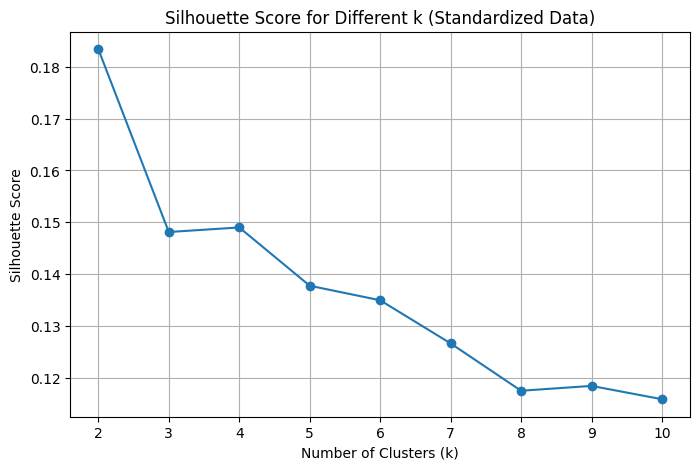


Silhouette Scores after PCA:
Silhouette Score for k=2: 0.18467043439369804
Silhouette Score for k=3: 0.16698821867114183
Silhouette Score for k=4: 0.14626763838715318
Silhouette Score for k=5: 0.13009214658075852
Silhouette Score for k=6: 0.1329834687674748
Silhouette Score for k=7: 0.12679241470729566
Silhouette Score for k=8: 0.11780742488223066
Silhouette Score for k=9: 0.11996835456669167
Silhouette Score for k=10: 0.1125344286332447


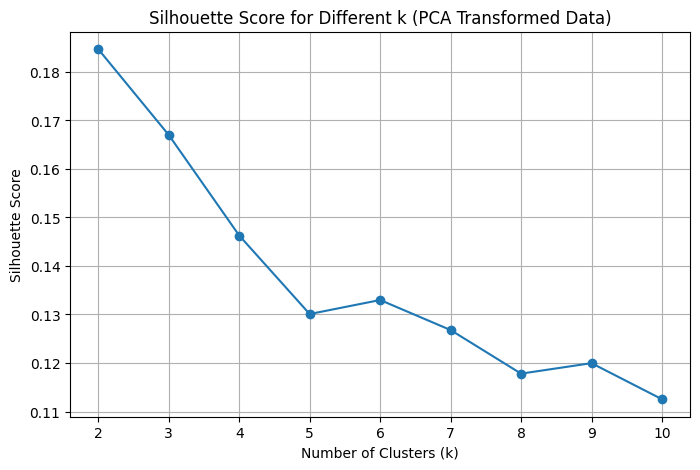

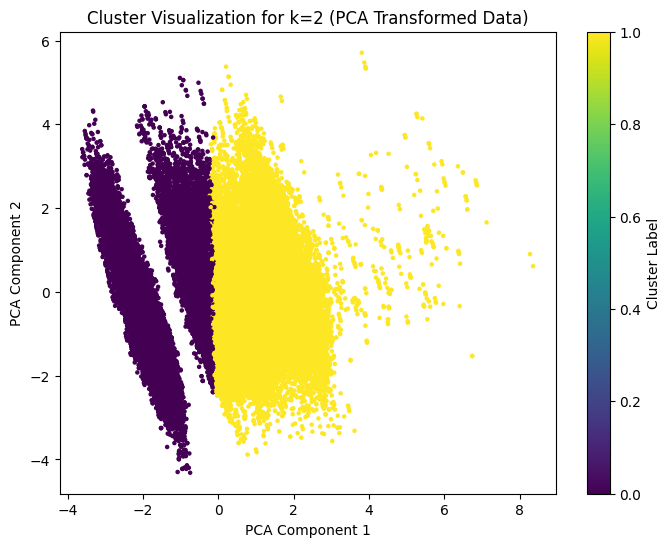

In [14]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Step 1: Standardize the Features
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

# Function to calculate silhouette score for a given k
def calculate_silhouette(k, data):
    model = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
    cluster_labels = model.fit_predict(data)
    score = silhouette_score(data, cluster_labels)
    return k, score, cluster_labels

# Evaluate silhouette scores for k=2 to k=10 in parallel (Standardized Data)
k_values = range(2, 11)
results_scaled = Parallel(n_jobs=-1)(
    delayed(calculate_silhouette)(k, data_for_clustering_scaled) for k in k_values
)

# Extract best k based on silhouette score (Standardized Data)
k_values, scores_scaled, cluster_labels_scaled_list = zip(*results_scaled)
best_k_scaled = k_values[scores_scaled.index(max(scores_scaled))]
best_cluster_labels_scaled = cluster_labels_scaled_list[scores_scaled.index(max(scores_scaled))]

# Print silhouette scores (Standardized Data)
print("\nSilhouette Scores after Scaling:")
for k, score in zip(k_values, scores_scaled):
    print(f"Silhouette Score for k={k}: {score}")

# Plot silhouette scores (Standardized Data)
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores_scaled, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k (Standardized Data)')
plt.grid()
plt.show()

# Step 2: Apply PCA for Dimensionality Reduction (Keep 95% Variance)
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_for_clustering_scaled)

# Evaluate silhouette scores for k=2 to k=10 in parallel (PCA Data)
results_pca = Parallel(n_jobs=-1)(
    delayed(calculate_silhouette)(k, data_pca) for k in k_values
)

# Extract best k based on silhouette score (PCA Data)
k_values, scores_pca, cluster_labels_pca_list = zip(*results_pca)
best_k_pca = k_values[scores_pca.index(max(scores_pca))]
best_cluster_labels_pca = cluster_labels_pca_list[scores_pca.index(max(scores_pca))]

# Print silhouette scores (PCA Data)
print("\nSilhouette Scores after PCA:")
for k, score in zip(k_values, scores_pca):
    print(f"Silhouette Score for k={k}: {score}")

# Plot silhouette scores (PCA Data)
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores_pca, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k (PCA Transformed Data)')
plt.grid()
plt.show()

# 2D Visualization of Clusters using the best k from PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=best_cluster_labels_pca, cmap='viridis', s=5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'Cluster Visualization for k={best_k_pca} (PCA Transformed Data)')
plt.colorbar(label='Cluster Label')
plt.show()


Silhouette Score for k=2: 0.17175910699513028
Silhouette Score for k=3: 0.12289273329158333
Silhouette Score for k=4: 0.10846016593920309
Silhouette Score for k=5: 0.11413672124951567
Silhouette Score for k=6: 0.11344199558587036
Silhouette Score for k=7: 0.11403210363592466
Silhouette Score for k=8: 0.10741382168522845
Silhouette Score for k=9: 0.10580625066268347
Silhouette Score for k=10: 0.1022397909321492


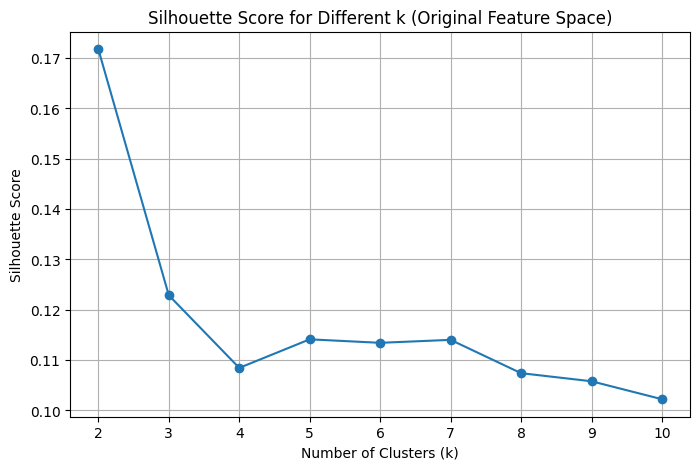

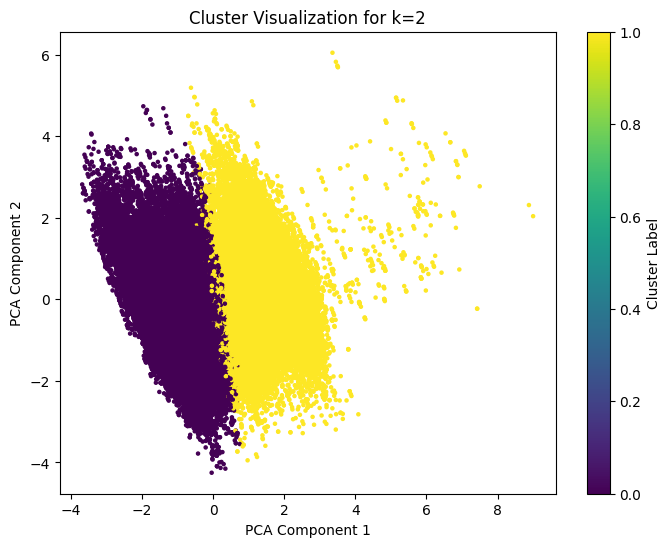

In [13]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Function to calculate silhouette score for a given k
def calculate_silhouette(k, data):
    model = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
    cluster_labels = model.fit_predict(data)
    score = silhouette_score(data, cluster_labels)
    return k, score, cluster_labels

# Evaluate silhouette scores for k=2 to k=10 in parallel
k_values = range(2, 11)
results = Parallel(n_jobs=-1)(
    delayed(calculate_silhouette)(k, data_for_clustering) for k in k_values
)

# Extract best k based on silhouette score
k_values, scores, cluster_labels_list = zip(*results)
best_k = k_values[scores.index(max(scores))]  # Choose k with highest silhouette score
best_cluster_labels = cluster_labels_list[scores.index(max(scores))]

# Print silhouette scores
for k, score in zip(k_values, scores):
    print(f"Silhouette Score for k={k}: {score}")

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k (Original Feature Space)')
plt.grid()
plt.show()

# Apply PCA for visualization (after selecting best_k)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_for_clustering)

# 2D Visualization of Clusters using the best k
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=best_cluster_labels, cmap='viridis', s=5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'Cluster Visualization for k={best_k}')
plt.colorbar(label='Cluster Label')
plt.show()


Silhouette Score for k=3: 0.11230197326875667
Silhouette Score for k=4: 0.12569641529994888
Silhouette Score for k=5: 0.12108449082309229
Silhouette Score for k=6: 0.1125061794504329
Silhouette Score for k=7: 0.10417441204891817


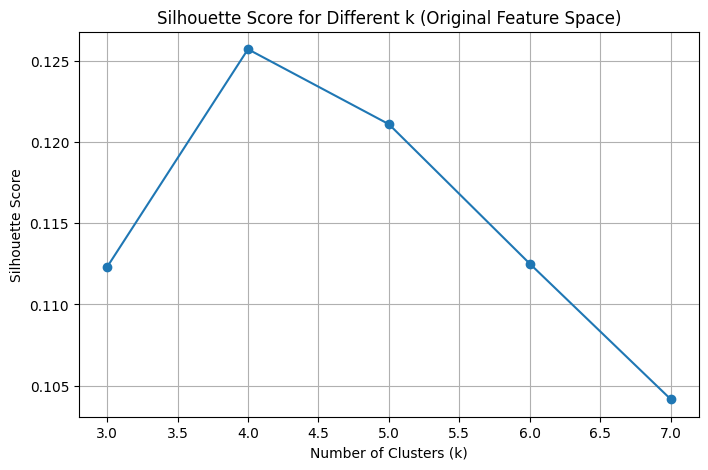

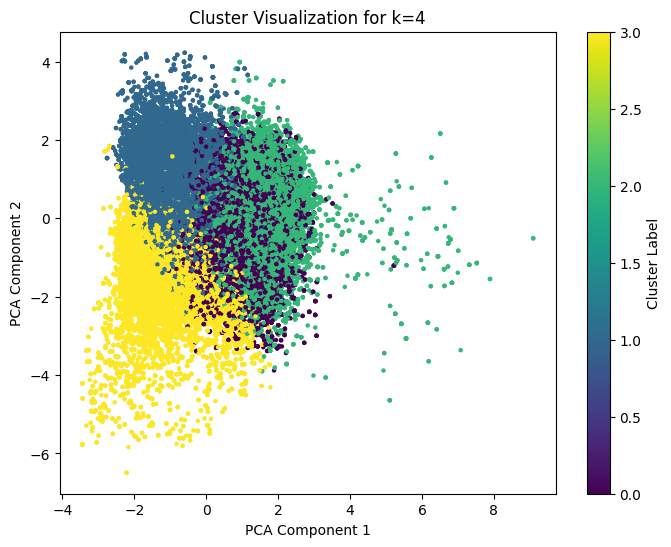

In [13]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Define a stratification column to ensure diverse sampling
df['stratify_column'] = df['SHOT_TYPE'].astype(str) + '_' + df['QUARTER'].astype(str)

# Sampling
sample_size = 100000  # Adjust sample size as needed
sampled_data, _ = train_test_split(
    df,
    test_size=(1 - sample_size / len(df)),
    stratify=df['stratify_column'],
    random_state=42
)

# Use only the selected features for clustering (in the original feature space)
data_for_clustering = sampled_data[selected_features]

# Function to calculate silhouette score for a given k
def calculate_silhouette(k, data):
    model = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
    cluster_labels = model.fit_predict(data)
    score = silhouette_score(data, cluster_labels)
    return k, score, cluster_labels

# Evaluate silhouette scores for k=3 to k=7 in parallel
k_values = range(3, 8)
results = Parallel(n_jobs=-1)(
    delayed(calculate_silhouette)(k, data_for_clustering) for k in k_values
)

# Extract best k based on silhouette score
k_values, scores, cluster_labels_list = zip(*results)
best_k = k_values[scores.index(max(scores))]  # Choose the k with the highest silhouette score
best_cluster_labels = cluster_labels_list[scores.index(max(scores))]

# Print silhouette scores
for k, score in zip(k_values, scores):
    print(f"Silhouette Score for k={k}: {score}")

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k (Original Feature Space)')
plt.grid()
plt.show()

# Apply PCA for visualization (after selecting best_k)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_for_clustering)

# 2D Visualization of Clusters using the best k
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=best_cluster_labels, cmap='viridis', s=5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'Cluster Visualization for k={best_k}')
plt.colorbar(label='Cluster Label')
plt.show()


# Clustering

In [5]:
selected_features =  ['SHOT_DISTANCE', 'DRBC', 'ORBC', 'time_left_in_game', 'BASIC_ZONE_Restricted Area', 'LOC_Y', 'time_left_in_quarter', 'LOC_X', 'rolling_efg_pct', 'zone_dfg%']
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=50000)

df['shot_cluster'] = minibatch_kmeans.fit_predict(df[selected_features])


In [6]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[selected_features])


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


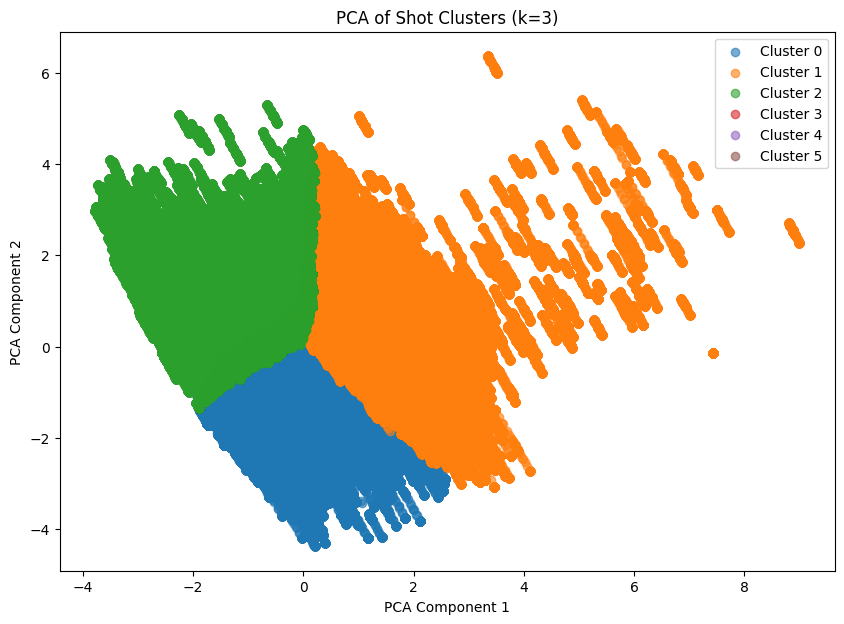

In [7]:
plt.figure(figsize=(10, 7))
for cluster in range(6):
    cluster_points = pca_components[df['shot_cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Shot Clusters (k=3)')
plt.legend()
plt.show()


In [ ]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Variance Explained:", pca.explained_variance_ratio_.cumsum())


Explained Variance Ratio: [0.18414886 0.15152185]
Cumulative Variance Explained: [0.18414886 0.33567072]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
pca_components = pca.fit_transform(df[selected_features])

print("Explained Variance by Each Component:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.cumsum())



Explained Variance by Each Component: [0.18414886 0.15152185 0.12595943 0.10934481 0.09986993 0.09705821
 0.08644347]
Cumulative Explained Variance: [0.18414886 0.33567072 0.46163014 0.57097495 0.67084489 0.7679031
 0.85434657]


In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=6)
pca_components = pca.fit_transform(df[selected_features])

print(f"Explained Variance (6 components): {pca.explained_variance_ratio_.sum()}")


Explained Variance (6 components): 0.7679030950502496


In [ ]:
from joblib import Parallel, delayed
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

sample_fraction = 0.05
sample_indices = np.random.choice(pca_components.shape[0], size=int(pca_components.shape[0] * sample_fraction), replace=False)
pca_sample = pca_components[sample_indices]

# Function to evaluate k on the sample
def evaluate_k(k):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=5000)
    labels = minibatch_kmeans.fit_predict(pca_sample)
    silhouette_avg = silhouette_score(pca_sample, labels)
    db_index = davies_bouldin_score(pca_sample, labels)
    return k, silhouette_avg, db_index

# Parallel computation for k=4 to k=6
results = Parallel(n_jobs=-1)(delayed(evaluate_k)(k) for k in range(2, 7))

# Print the results
for k, silhouette, db in results:
    print(f"\nFor k={k}:")
    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Index: {db}")



KeyboardInterrupt: 

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import pandas as pd

minibatch_kmeans = MiniBatchKMeans(n_clusters=6, random_state=42, batch_size=50000)
df['shot_cluster'] = minibatch_kmeans.fit_predict(pca_components)

# Analyze cluster centroids
centroids = minibatch_kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=[f'PCA_{i+1}' for i in range(pca_components.shape[1])])
print("\nCluster Centroids:\n", centroid_df)



Cluster Centroids:
       PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6
0 -1.399946 -0.442285 -0.042335 -0.565153 -0.057687  0.032794
1  1.239865 -0.186168  0.080787  0.225427 -1.325153  0.049915
2  1.442806 -0.222282 -0.018779 -0.214740  1.106105  0.079695
3 -0.617821  0.858303  1.116749  0.163655  0.123197 -0.136153
4 -0.653826 -2.502355 -0.164272  0.774558  0.168747  0.019960
5 -0.562607  1.082666 -1.046955  0.138180 -0.001157 -0.050788


In [ ]:
# Calculate shooting efficiency (mean `SHOT_MADE`) by cluster
cluster_efficiency = df.groupby('shot_cluster')['SHOT_MADE'].mean()
print("\nShooting Efficiency by Cluster:\n", cluster_efficiency)

# Optional: Count number of shots in each cluster
cluster_counts = df['shot_cluster'].value_counts()
print("\nNumber of Shots per Cluster:\n", cluster_counts)



Shooting Efficiency by Cluster:
 shot_cluster
0    0.532957
1    0.365728
2    0.525674
Name: SHOT_MADE, dtype: float64

Number of Shots per Cluster:
 shot_cluster
2    8377447
1    6725540
0    5031707
Name: count, dtype: int64


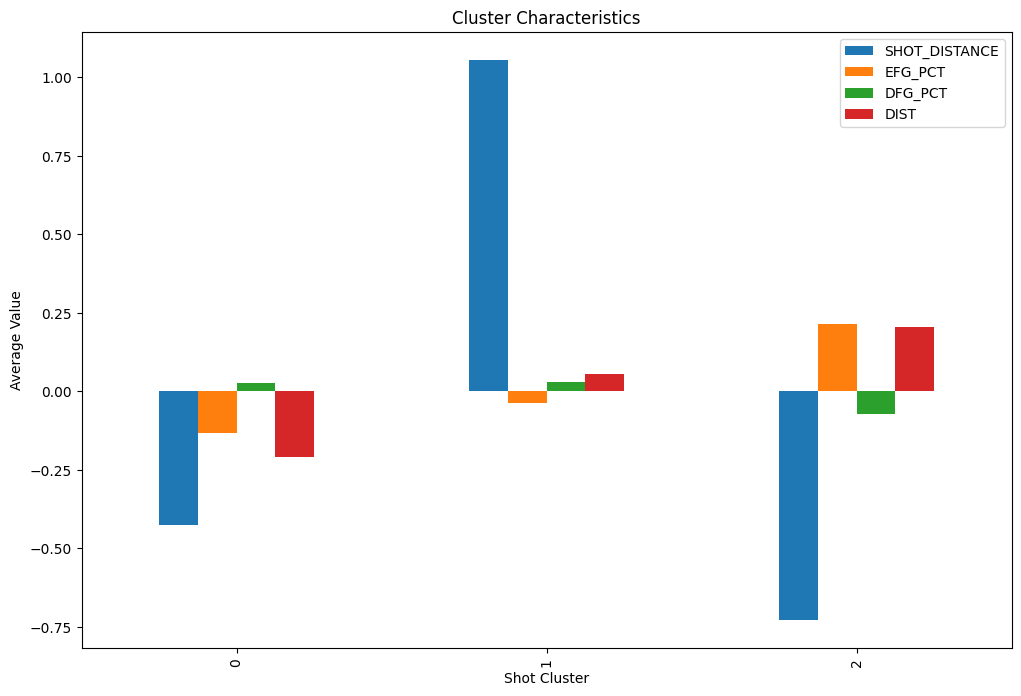

In [9]:
# Create bar plots for key features by cluster
import matplotlib.pyplot as plt

features_to_plot = ['SHOT_DISTANCE', 'EFG_PCT', 'DFG_PCT', 'DIST']
cluster_means = df.groupby('shot_cluster')[features_to_plot].mean()

cluster_means.plot(kind='bar', figsize=(12, 8))
plt.title("Cluster Characteristics")
plt.xlabel("Shot Cluster")
plt.ylabel("Average Value")
plt.legend(loc="upper right")
plt.show()


In [10]:
# Group data by clusters and calculate key statistics
cluster_stats = df.groupby('shot_cluster').agg({
    'SHOT_DISTANCE': 'mean',
    'LOC_X_orig': 'mean',
    'LOC_Y_orig': 'mean',
    'EFG_PCT': 'mean',
    'DFG_PCT': 'mean',
    'SHOT_MADE': 'mean',
    'time_left_in_game': 'mean',
    'clutch_dfg_pct': 'mean',
    'DIST': 'mean'
}).reset_index()

print(cluster_stats)


   shot_cluster  SHOT_DISTANCE  LOC_X_orig  LOC_Y_orig   EFG_PCT   DFG_PCT  \
0             0      -0.426078    0.271672    8.740738 -0.132818  0.026709   
1             1       1.056008    0.352177   26.070919 -0.035741  0.030448   
2             2      -0.727221   -0.111882    8.637140  0.216411 -0.071764   

   SHOT_MADE  time_left_in_game  clutch_dfg_pct      DIST  
0   0.514237          -0.176737        0.107005 -0.209771  
1   0.364901           0.010856        0.039874  0.056203  
2   0.554297           0.217042       -0.187805  0.205011  



Shooting Efficiency by Cluster:
 shot_cluster
0    0.514237
1    0.364901
2    0.554297
Name: SHOT_MADE, dtype: float64


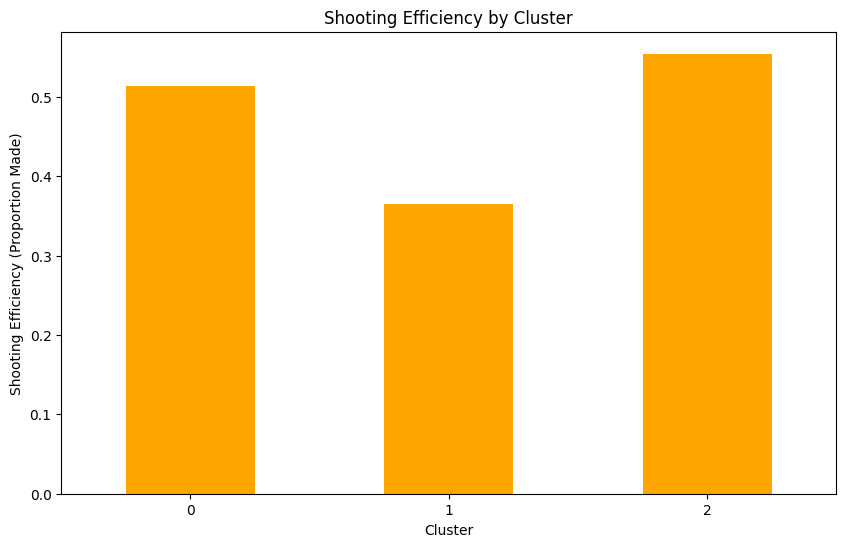

In [11]:
# Calculate shooting efficiency by cluster
cluster_efficiency = df.groupby('shot_cluster')['SHOT_MADE'].mean()
print("\nShooting Efficiency by Cluster:\n", cluster_efficiency)

# Visualize shooting efficiency
cluster_efficiency.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Shooting Efficiency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Shooting Efficiency (Proportion Made)')
plt.xticks(rotation=0)
plt.show()



Average Feature Values by Cluster:
               SHOT_DISTANCE_orig  EFG_PCT_orig  DIST_orig  ORBC_orig  \
shot_cluster                                                           
0                       9.204733      0.529196   2.076870   0.877856   
1                      24.846153      0.542264   2.246006   0.990786   
2                       6.026571      0.576206   2.340635   1.852334   

              DRBC_orig  
shot_cluster             
0              4.643074  
1              6.165298  
2              9.910231  


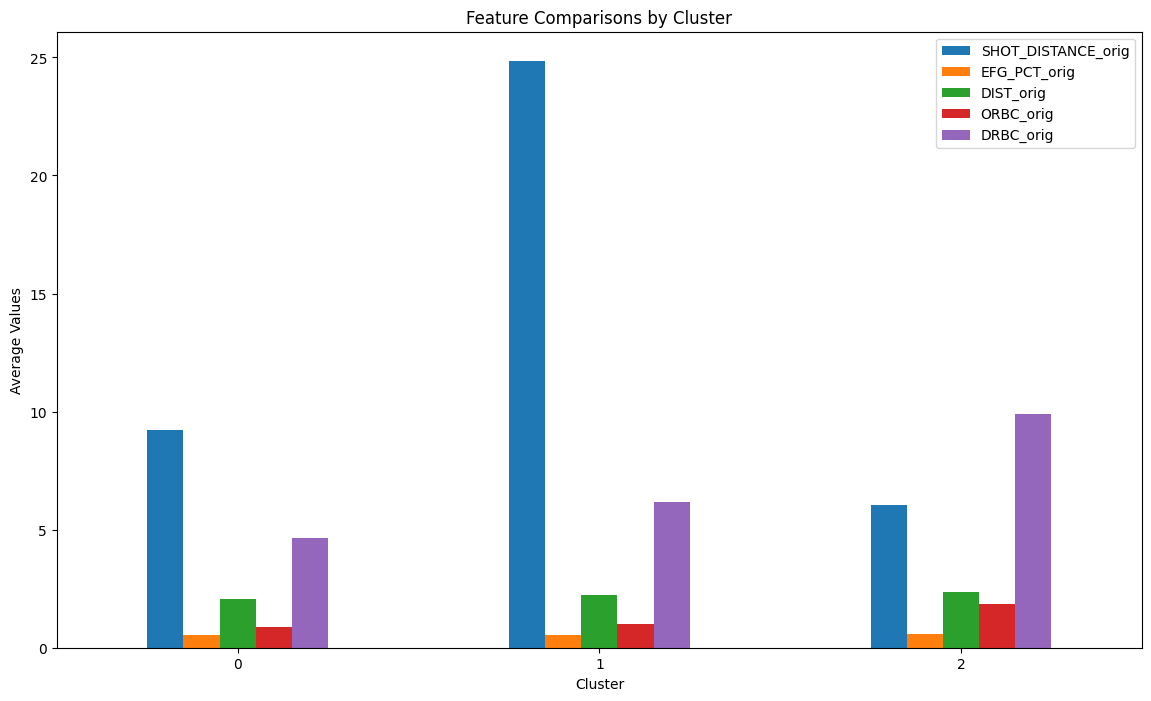

In [12]:
key_features = ['SHOT_DISTANCE_orig' ,'EFG_PCT_orig', 'DIST_orig', 'ORBC_orig', 'DRBC_orig']
cluster_means = df.groupby('shot_cluster')[key_features].mean()
print("\nAverage Feature Values by Cluster:\n", cluster_means)


cluster_means.plot(kind='bar', figsize=(14, 8))
plt.title('Feature Comparisons by Cluster')
plt.ylabel('Average Values')
plt.xlabel('Cluster')
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.show()


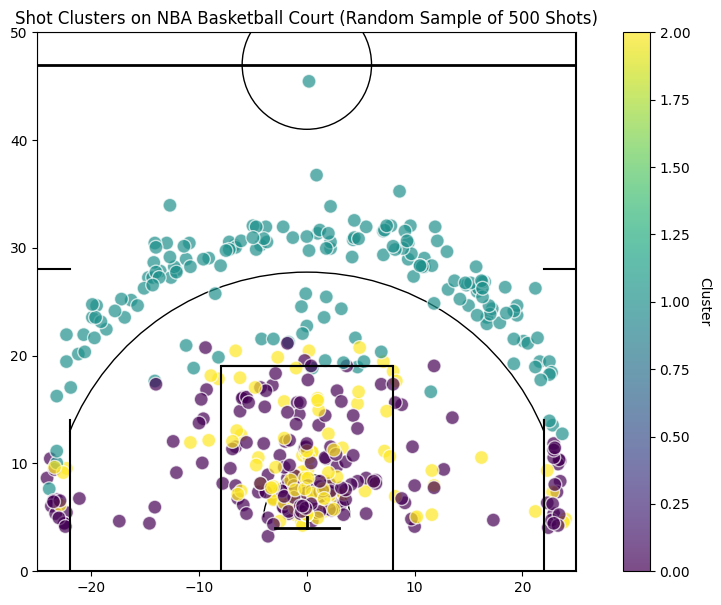

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def draw_basketball_court(ax=None):
    if ax is None:
        ax = plt.gca()


    plt.plot([-25, 25, 25, -25, -25], [0, 0, 50, 50, 0], color='black')
    center_circle = plt.Circle((0, 47), 6, color='black', fill=False)
    ax.add_artist(center_circle)
    plt.plot([-8, -8, 8, 8, -8], [0, 19, 19, 0, 0], color='black')
    plt.plot([-8, 8], [19, 19], color='black')
    restricted_area = Arc((0, 5), 8, 8, angle=0, theta1=0, theta2=180, color='black')
    ax.add_artist(restricted_area)
    plt.plot([-3, 3], [4, 4], color='black', linewidth=2)
    plt.plot([0, 0], [4, 5], color='black', linewidth=2)
    three_pt_arc = Arc((0, 4), 47.5, 47.5, angle=0, theta1=22, theta2=158, color='black')
    ax.add_artist(three_pt_arc)
    plt.plot([-22, -22], [0, 14], color='black')
    plt.plot([22, 22], [0, 14], color='black')
    plt.plot([-25, -22], [28, 28], color='black')
    plt.plot([22, 25], [28, 28], color='black')
    plt.plot([-25, 25], [47, 47], color='black', linewidth=2)

df_sampled = df.sample(n=500, random_state=42)

plt.figure(figsize=(12, 7))
ax = plt.gca()
draw_basketball_court(ax)


scatter = plt.scatter(df_sampled['LOC_X_orig'], df_sampled['LOC_Y_orig'],
                      c=df_sampled['shot_cluster'], cmap='viridis', alpha=0.7, edgecolors='w', s=100)

colorbar = plt.colorbar(scatter, ax=ax)
colorbar.set_label('Cluster', rotation=270, labelpad=15)


plt.xlim(-25, 25)
plt.ylim(0, 50)
plt.title('Shot Clusters on NBA Basketball Court (Random Sample of 500 Shots)')
plt.grid(False)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


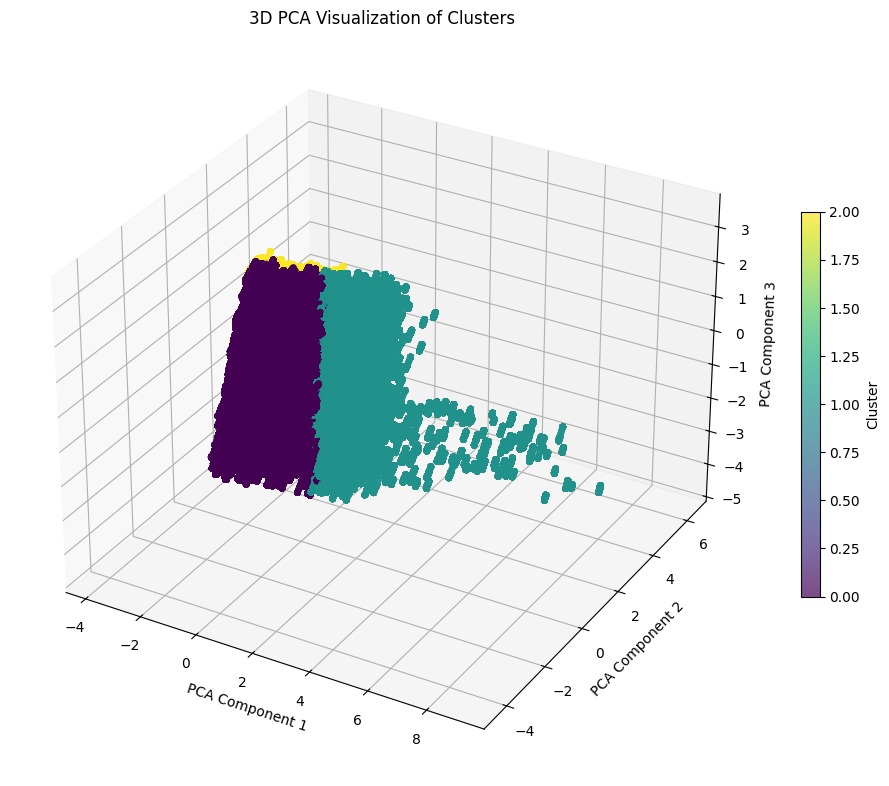

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions to 3D
pca_3d = PCA(n_components=3)
pca_components_3d = pca_3d.fit_transform(df[selected_features])

# Add cluster labels to the PCA-transformed DataFrame
pca_3d_df = pd.DataFrame(pca_components_3d, columns=['PCA_1', 'PCA_2', 'PCA_3'])
pca_3d_df['Cluster'] = df['shot_cluster']

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_3d_df['PCA_1'], pca_3d_df['PCA_2'], pca_3d_df['PCA_3'],
    c=pca_3d_df['Cluster'], cmap='viridis', alpha=0.7, s=15
)

# Add labels and legend
ax.set_title('3D PCA Visualization of Clusters')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add color bar
colorbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
colorbar.set_label('Cluster')

plt.show()


In [15]:
# Redefine mid-range filter with updated boundaries
mid_range_filter = (df['SHOT_DISTANCE_orig'] > 4) & (df['SHOT_DISTANCE_orig'] <= 22)

# Analyze mid-range shot distribution again
mid_range_distribution = df[mid_range_filter].groupby('shot_cluster').size()
total_mid_range_shots = mid_range_filter.sum()

print("Mid-Range Shot Distribution by Cluster:")
print(mid_range_distribution)
print(f"Total Mid-Range Shots: {total_mid_range_shots}")



Mid-Range Shot Distribution by Cluster:
shot_cluster
0    3248735
1     941095
2    1971252
dtype: int64
Total Mid-Range Shots: 6161082


In [16]:
cluster_names = {
    0: "High-Efficiency Close-Range Shots",
    1: "Low-Efficiency Long-Range Shots",
    2: "Dynamic Close-Range or Mid-Range Shots"
}

# Apply cluster names to dataset
df['shot_cluster_name'] = df['shot_cluster'].map(cluster_names)

# Verify mapping
print(df[['shot_cluster', 'shot_cluster_name']].head(10))


   shot_cluster                       shot_cluster_name
0             2  Dynamic Close-Range or Mid-Range Shots
1             2  Dynamic Close-Range or Mid-Range Shots
2             2  Dynamic Close-Range or Mid-Range Shots
3             2  Dynamic Close-Range or Mid-Range Shots
4             2  Dynamic Close-Range or Mid-Range Shots
5             2  Dynamic Close-Range or Mid-Range Shots
6             2  Dynamic Close-Range or Mid-Range Shots
7             2  Dynamic Close-Range or Mid-Range Shots
8             2  Dynamic Close-Range or Mid-Range Shots
9             2  Dynamic Close-Range or Mid-Range Shots


# Second Stage Clustering


In [17]:
# Player-level shot distribution
player_cluster_distribution = df.groupby(['PLAYER_NAME', 'shot_cluster']).size().unstack(fill_value=0)
player_cluster_distribution = player_cluster_distribution.div(player_cluster_distribution.sum(axis=1), axis=0)

# Team-level shot distribution
team_cluster_distribution = df.groupby(['TEAM_NAME', 'shot_cluster']).size().unstack(fill_value=0)
team_cluster_distribution = team_cluster_distribution.div(team_cluster_distribution.sum(axis=1), axis=0)

print("Player-Level Distribution:\n", player_cluster_distribution.head())
print("Team-Level Distribution:\n", team_cluster_distribution.head())


Player-Level Distribution:
 shot_cluster          0         1         2
PLAYER_NAME                                
A.J. Lawson    0.987013  0.000000  0.012987
Aaron Gordon   0.136152  0.127234  0.736614
Aaron Holiday  0.546822  0.453178  0.000000
Aaron Nesmith  0.179724  0.331314  0.488963
Aaron Wiggins  0.469410  0.196315  0.334275
Team-Level Distribution:
 shot_cluster              0         1         2
TEAM_NAME                                      
Atlanta Hawks      0.327915  0.364987  0.307098
Boston Celtics     0.271963  0.417517  0.310521
Brooklyn Nets      0.436462  0.342370  0.221168
Charlotte Hornets  0.379043  0.402079  0.218879
Chicago Bulls      0.428894  0.301363  0.269743


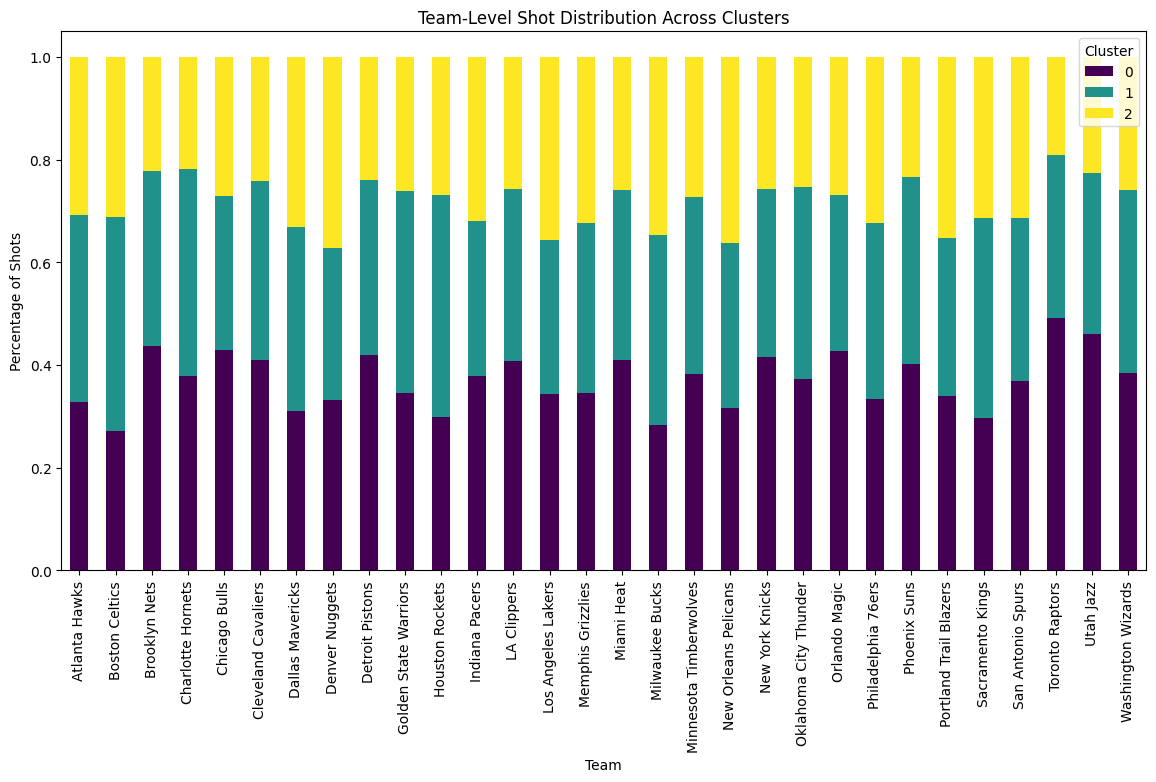

In [18]:
# Visualize team-level distribution
team_cluster_distribution.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Team-Level Shot Distribution Across Clusters')
plt.ylabel('Percentage of Shots')
plt.xlabel('Team')
plt.legend(title='Cluster')
plt.xticks(rotation=90)
plt.show()


In [19]:
from sklearn.cluster import KMeans
player_clusters = KMeans(n_clusters=3, random_state=42).fit_predict(player_cluster_distribution)

player_cluster_distribution['player_cluster'] = player_clusters
print(player_cluster_distribution.head())


shot_cluster          0         1         2  player_cluster
PLAYER_NAME                                                
A.J. Lawson    0.987013  0.000000  0.012987               0
Aaron Gordon   0.136152  0.127234  0.736614               2
Aaron Holiday  0.546822  0.453178  0.000000               1
Aaron Nesmith  0.179724  0.331314  0.488963               2
Aaron Wiggins  0.469410  0.196315  0.334275               0


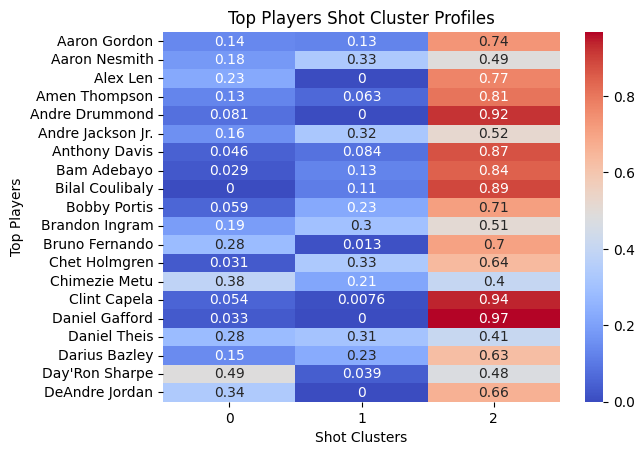

In [20]:
import seaborn as sns# Select players with the most shots
top_players = player_cluster_distribution.sum(axis=1).nlargest(20).index
top_players_data = player_cluster_distribution.loc[top_players]

# Visualize the subset
sns.heatmap(top_players_data.iloc[:, :-1], cmap='coolwarm', annot=True)
plt.title('Top Players Shot Cluster Profiles')
plt.xlabel('Shot Clusters')
plt.ylabel('Top Players')
plt.show()


In [21]:
# Calculate the mean shot cluster proportions for each player cluster
cluster_characteristics = player_cluster_distribution.groupby('player_cluster').mean()

# Display the characteristics of each cluster
print("\nCluster Characteristics (Mean Shot Distribution by Player Cluster):\n", cluster_characteristics)



Cluster Characteristics (Mean Shot Distribution by Player Cluster):
 shot_cluster           0         1         2
player_cluster                              
0               0.723323  0.192004  0.084673
1               0.394449  0.506294  0.099256
2               0.172030  0.154495  0.673475


In [23]:
df = df.merge(player_cluster_distribution[['player_cluster']], on='PLAYER_NAME', how='left')


In [22]:
# Calculate shooting efficiency by player cluster
cluster_efficiency = df.groupby('player_cluster')['SHOT_MADE'].mean()
print("\nShooting Efficiency by Player Cluster:\n", cluster_efficiency)

KeyError: 'player_cluster'

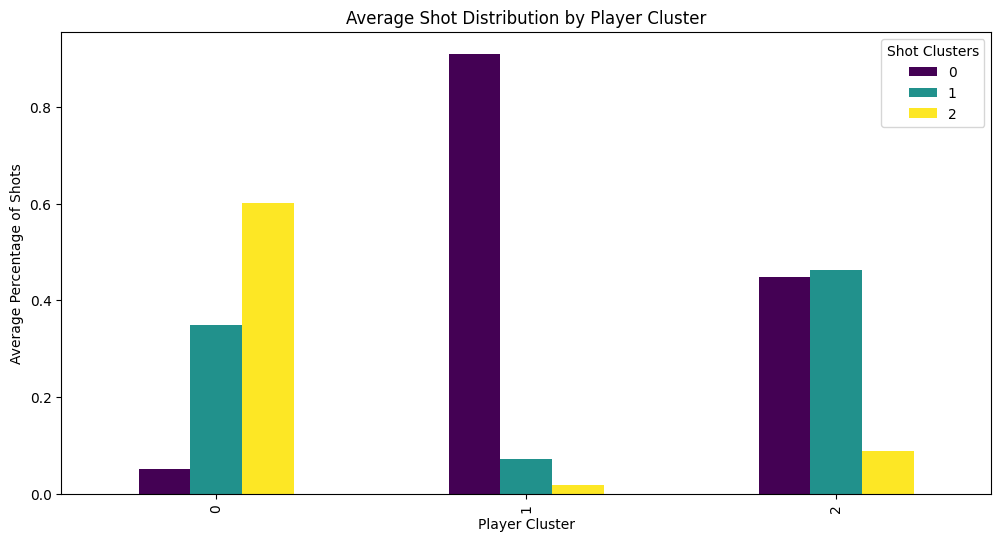

In [ ]:
# Ensure 'player_cluster' exists
if 'player_cluster' not in player_cluster_distribution.columns:
    player_cluster = df.groupby('PLAYER_NAME')['shot_cluster'].apply(lambda x: x.mode()[0])  # Most common cluster
    player_cluster_distribution = player_cluster_distribution.join(player_cluster.rename('player_cluster'))

# Aggregate by player clusters
cluster_means = player_cluster_distribution.groupby('player_cluster').mean()

# Plot grouped bar chart
cluster_means.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Average Shot Distribution by Player Cluster')
plt.ylabel('Average Percentage of Shots')
plt.xlabel('Player Cluster')
plt.legend(title='Shot Clusters')
plt.show()


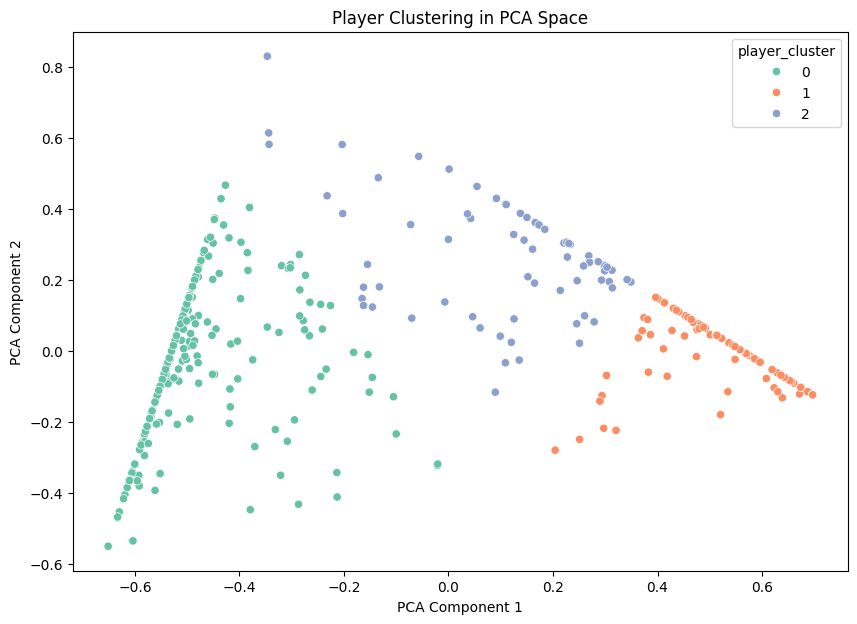

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(player_cluster_distribution.iloc[:, :-1])

# Visualize players in 2D space
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1],
                hue=player_cluster_distribution['player_cluster'],
                palette='Set2', legend='full')
plt.title('Player Clustering in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


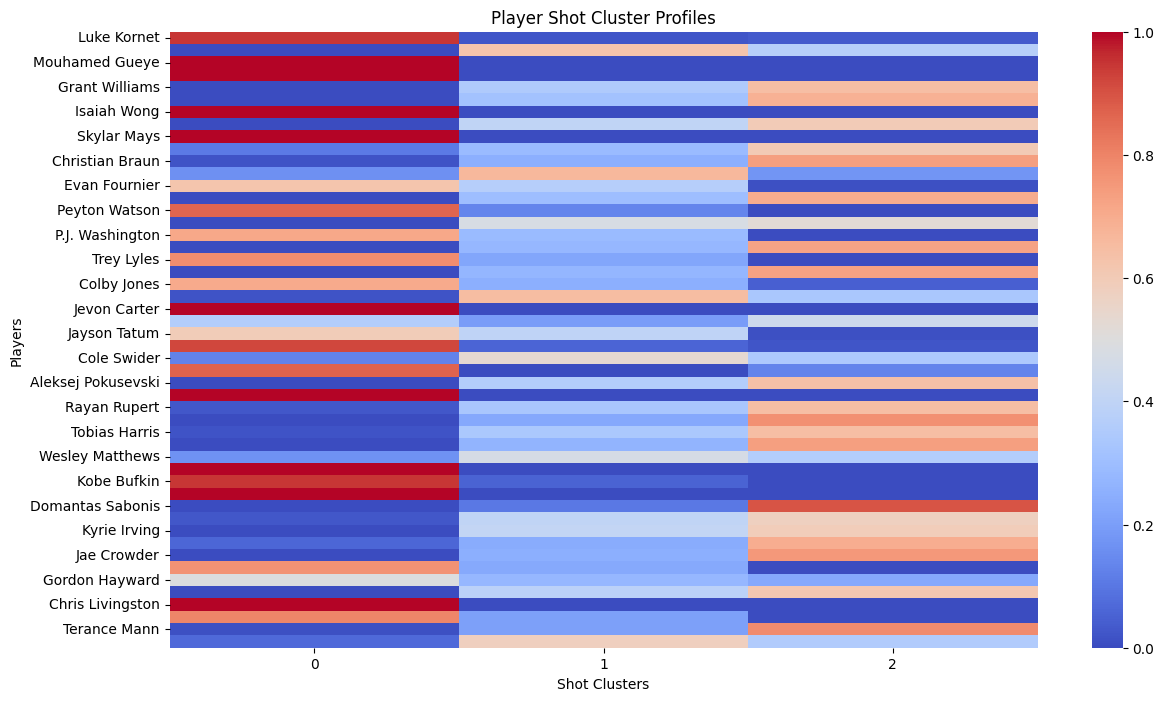

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by PLAYER_NAME and shot_cluster, count occurrences
player_cluster_distribution = df.groupby(['PLAYER_NAME', 'shot_cluster']).size().unstack(fill_value=0)

# Normalize the cluster distribution for each player
player_cluster_distribution = player_cluster_distribution.div(player_cluster_distribution.sum(axis=1), axis=0)

# Ensure the data is not too large for visualization
sampled_player_clusters = player_cluster_distribution.sample(n=50, random_state=42)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(sampled_player_clusters, cmap='coolwarm', annot=False)
plt.title('Player Shot Cluster Profiles')
plt.xlabel('Shot Clusters')
plt.ylabel('Players')
plt.show()
